In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# File to Load (Remember to check these)
starr_data_to_load = "YOY_1819_combined_csv.csv"
starr_dataTw_to_load = "YOY_1921_combined_csv.csv"
starr_dataTh_to_load = "YOY_2122_combined_csv.csv"

# Read each database
sa1_df = pd.read_csv(starr_data_to_load)
sb1_df = pd.read_csv(starr_dataTw_to_load)
sc1_df = pd.read_csv(starr_dataTh_to_load)

# 18-19 Combined Data

In [2]:
# DATA CLEANING SA

# Display the data table for preview
sa1_df.head()

# Find missing values
sa1_df.isnull().sum()

# drop NaNs
sa1_df = sa1_df.dropna()

# change column names
sa1_df.rename(columns={"Primary_Key_2018_2019": "key", "School_Name": "school", "Grade_Test_Type":"grade-sub", "Mastery_Level":"mastery", "Baseline_Year":"baseyr", "Compared_Year":"compyr", "YOY_State_2019":"state", "YOY_Region_2019":"region", "YOY_District_2019":"district", "YOY_African_American_2019":"afriamer", "YoY_Hispanic_2019":"hispan", "YoY_White_2019":"white", "YoY_Econ_Disadv_2019":"edisadv", "YoY_ELL_2019":"ell"}, inplace=True)
sa1_df

# drop base and compared year
sa_df = sa1_df.drop(columns=["key", "baseyr", "compyr"])
sa_df

# drop rows with grade 8 & EOC
## identify partial string
## discard = ["Grade 8"]
## discard2 = ["End of Course"]
  
# drop rows that contain the partial string "Grade 8"
## sa_df[~sa_df.grade-sub.str.contains("|".join(discard))] - doesn't work
sa_df = sa_df.drop(sa_df[sa_df["grade-sub"].str.contains("8")].index)
sa_df = sa_df.drop(sa_df[sa_df["grade-sub"].str.contains("End")].index)
sa_df

,school,grade-sub,mastery,state,region,district,afriamer,hispan,white,edisadv,ell
26,Aldine_ISD,Grade 3 Mathematics,At Approaches Grade Level or Above,0.010,0.00,-0.020,-0.040,-0.010,-0.05,-0.030,-0.02
27,Aldine_ISD,Grade 3 Mathematics,At Meets Grade Level or Above,0.020,0.01,0.001,-0.030,0.010,-0.08,-0.010,0.01
28,Aldine_ISD,Grade 3 Mathematics,At Masters Grade Level,0.020,0.01,0.001,-0.010,0.010,-0.04,0.001,0.02
29,Aldine_ISD,Grade 3 Reading,At Approaches Grade Level or Above,-0.010,-0.01,-0.040,-0.020,-0.040,-0.07,-0.040,-0.04
30,Aldine_ISD,Grade 3 Reading,At Meets Grade Level or Above,0.020,0.02,0.020,0.001,0.020,-0.13,0.010,0.02
...,...,...,...,...,...,...,...,...,...,...,...
692,Yes_Prep,Grade 7 Reading,At Meets Grade Level or Above,0.010,0.01,0.010,0.060,0.001,0.16,0.010,-0.04
693,Yes_Prep,Grade 7 Reading,At Masters Grade Level,0.001,0.01,0.010,0.001,0.010,0.09,0.010,-0.03
694,Yes_Prep,Grade 7 Writing,At Approaches Grade Level or Above,0.010,0.03,0.060,0.100,0.050,0.21,0.060,0.01
695,Yes_Prep,Grade 7 Writing,At Meets Grade Level or Above,-0.010,-0.01,0.070,0.040,0.060,0.13,0.080,0.01


In [3]:
# Data Exploration
sa_df.describe()

,state,region,district,afriamer,hispan,white,edisadv,ell
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,0.012528,0.010256,0.008059,0.003881,0.007989,0.015571,0.003950,0.003358
std,0.025347,0.026905,0.042115,0.092683,0.047102,0.071922,0.048836,0.061330
min,-0.030000,-0.040000,-0.170000,-0.800000,-0.330000,-0.240000,-0.420000,-0.510000
25%,-0.010000,-0.010000,-0.020000,-0.030000,-0.020000,-0.030000,-0.020000,-0.020000
50%,0.010000,0.010000,0.001000,0.001000,0.010000,0.010000,0.001000,0.001000
75%,0.030000,0.020000,0.030000,0.040000,0.040000,0.050000,0.030000,0.030000
max,0.080000,0.080000,0.190000,0.610000,0.150000,0.330000,0.160000,0.370000


Text(0, 0.5, 'Population')

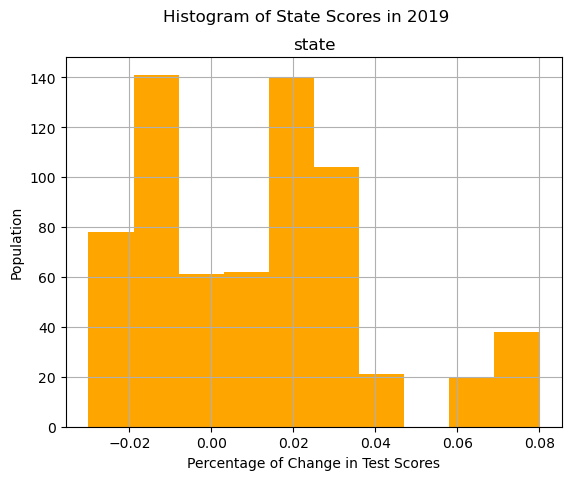

In [4]:
# Histogram looking at frequency of increase and/or decrease in state scores
sa_df.hist(column="state", color="orange")
plt.suptitle("Histogram of State Scores in 2019")
plt.xlabel("Percentage of Change in Test Scores")
plt.ylabel("Population")

In [5]:
sa_df.head(600)
#sa_df.hist(column="hispan", by="grade-sub");

,school,grade-sub,mastery,state,region,district,afriamer,hispan,white,edisadv,ell
26,Aldine_ISD,Grade 3 Mathematics,At Approaches Grade Level or Above,0.010,0.00,-0.020,-0.040,-0.010,-0.050,-0.030,-0.020
27,Aldine_ISD,Grade 3 Mathematics,At Meets Grade Level or Above,0.020,0.01,0.001,-0.030,0.010,-0.080,-0.010,0.010
28,Aldine_ISD,Grade 3 Mathematics,At Masters Grade Level,0.020,0.01,0.001,-0.010,0.010,-0.040,0.001,0.020
29,Aldine_ISD,Grade 3 Reading,At Approaches Grade Level or Above,-0.010,-0.01,-0.040,-0.020,-0.040,-0.070,-0.040,-0.040
30,Aldine_ISD,Grade 3 Reading,At Meets Grade Level or Above,0.020,0.02,0.020,0.001,0.020,-0.130,0.010,0.020
...,...,...,...,...,...,...,...,...,...,...,...
621,Spring_ISD,Grade 4 Reading,At Masters Grade Level,-0.020,-0.02,0.001,-0.010,0.001,-0.020,0.001,-0.010
622,Spring_ISD,Grade 5 Mathematics+,At Approaches Grade Level or Above,-0.010,-0.01,-0.010,-0.020,0.010,0.001,0.001,0.001
623,Spring_ISD,Grade 5 Mathematics+,At Meets Grade Level or Above,0.001,0.01,0.001,0.001,0.001,-0.040,-0.010,0.010
624,Spring_ISD,Grade 5 Mathematics+,At Masters Grade Level,0.060,0.07,0.050,0.020,0.060,0.010,0.050,0.070


# Combined 19-21 Data

In [6]:
# DATA CLEANING SB

# Display the data table for preview
sb1_df.head()

# Find missing values
sb1_df.isnull().sum()

# drop NaNs
sb1_df = sb1_df.dropna()

# change column names
sb1_df.rename(columns={"Primary_Key_2019_2021": "key", "School_Name": "school", "Grade_Test_Type":"grade-sub", "Mastery_Level":"mastery", "Baseline_Year":"baseyr", "Compared_Year":"compyr", "YOY_State_2021":"state", "YOY_Region_2021":"region", "YOY_District_2021":"district", "YOY_African_American_2021":"afriamer", "YoY_Hispanic_2021":"hispan", "YoY_White_2021":"white", "YoY_Econ_Disadv_2021":"edisadv", "YoY_ELL_2021":"ell"}, inplace=True)
sb1_df

# drop base and compared year
sb_df = sb1_df.drop(columns=["key", "baseyr", "compyr"])

# drop rows with grade 8 & EOC
# drop rows that contain the partial string "8"
## sa_df[~sa_df.grade-sub.str.contains("|".join(discard))] - doesn't work
sb_df = sb_df.drop(sb_df[sb_df["grade-sub"].str.contains("8")].index)
sb_df = sb_df.drop(sb_df[sb_df["grade-sub"].str.contains("End")].index)
sb_df

,school,grade-sub,mastery,state,region,district,afriamer,hispan,white,edisadv,ell
0,Aldine_ISD,Grade 3 Mathematics,At Masters Grade Level,-0.11,-0.10,-0.12,-0.07,-0.14,-0.12,-0.13,-0.16
1,Aldine_ISD,Grade 3 Mathematics,At Meets Grade Level or Above,-0.18,-0.18,-0.28,-0.20,-0.30,-0.33,-0.27,-0.31
2,Aldine_ISD,Grade 3 Mathematics,At Approaches Grade Level or Above,-0.17,-0.17,-0.37,-0.38,-0.37,-0.47,-0.37,-0.39
3,Aldine_ISD,Grade 3 Reading,At Masters Grade Level,-0.08,-0.08,-0.11,-0.09,-0.12,-0.18,-0.12,-0.12
4,Aldine_ISD,Grade 3 Reading,At Meets Grade Level or Above,-0.06,-0.07,-0.16,-0.12,-0.17,-0.11,-0.15,-0.18
...,...,...,...,...,...,...,...,...,...,...,...
426,YES_Prep,Grade 7 Reading,At Meets Grade Level or Above,-0.04,-0.04,-0.07,-0.01,-0.08,-0.10,-0.07,-0.09
427,YES_Prep,Grade 7 Reading,At Approaches Grade Level or Above,-0.07,-0.06,-0.10,-0.08,-0.10,-0.16,-0.10,-0.11
428,YES_Prep,Grade 7 Writing,At Masters Grade Level,-0.08,-0.09,-0.10,-0.07,-0.11,-0.12,-0.10,-0.08
429,YES_Prep,Grade 7 Writing,At Meets Grade Level or Above,-0.09,-0.09,-0.16,-0.06,-0.18,-0.06,-0.17,-0.20


Text(0, 0.5, 'Population')

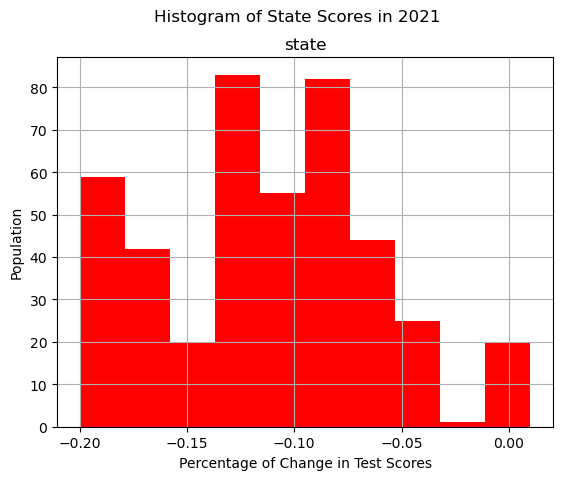

In [7]:
# Data Exploration
sb_df.describe()

# Histogram looking at frequency of increase and/or decrease in state scores
sb_df.hist(column="state", color="red")
plt.suptitle("Histogram of State Scores in 2021")
plt.xlabel("Percentage of Change in Test Scores")
plt.ylabel("Population")

# Combined 21-22 Data

In [8]:
# DATA CLEANING SC

# Display the data table for preview
sc1_df.head()

# Find missing values
sc1_df.isnull().sum()

# drop NaNs
sc1_df = sc1_df.dropna()

# delete duplicates
sc1_df.duplicated().sum()
sc1_df = sc1_df.drop_duplicates()
sc1_df.head(14)

# change column names
sc1_df.rename(columns={"Primary_Key_2021_2022": "key", "School_Name": "school", "Grade_Test_Type":"grade-sub", "Mastery_Level":"mastery", "Baseline_Year":"baseyr", "Compared_Year":"compyr", "YOY_State_2022":"state", "YOY_Region_2022":"region", "YOY_District_2022":"district", "YOY_African_American_2022":"afriamer", "YoY_Hispanic_2022":"hispan", "YoY_White_2022":"white", "YoY_Econ_Disadv_2022":"edisadv", "YoY_ELL_2022":"ell"}, inplace=True)
sc1_df

# drop base and compared year
sc_df = sc1_df.drop(columns=["key", "baseyr", "compyr"])

# drop rows with grade 8 & EOC
# drop rows that contain the partial string "8"
sc_df = sc_df.drop(sc_df[sc_df["grade-sub"].str.contains("8")].index)
sc_df = sc_df.drop(sc_df[sc_df["grade-sub"].str.contains("End")].index)
sc_df

,school,grade-sub,mastery,state,region,district,afriamer,hispan,white,edisadv,ell
0,Aldine_ISD,Grade 3 Mathematics,At Approaches Grade Level or Above,0.09,0.09,0.15,0.14,0.14,0.32,0.15,0.15
2,Aldine_ISD,Grade 3 Mathematics,At Masters Grade Level,0.07,0.07,0.04,0.04,0.04,0.04,0.05,0.04
4,Aldine_ISD,Grade 3 Mathematics,At Meets Grade Level or Above,0.12,0.13,0.13,0.09,0.13,0.19,0.12,0.12
6,Aldine_ISD,Grade 3 Reading,At Approaches Grade Level or Above,0.09,0.08,0.17,0.16,0.18,0.13,0.17,0.17
8,Aldine_ISD,Grade 3 Reading,At Masters Grade Level,0.11,0.11,0.08,0.05,0.09,0.09,0.09,0.07
...,...,...,...,...,...,...,...,...,...,...,...
1452,Yes_Prep_Schools,Grade 7 Mathematics,At Masters Grade Level,0.01,0.02,0.03,0.04,0.03,-0.04,0.03,0.05
1454,Yes_Prep_Schools,Grade 7 Mathematics,At Meets Grade Level or Above,0.04,0.05,0.09,0.06,0.10,0.04,0.09,0.14
1456,Yes_Prep_Schools,Grade 7 Reading,At Approaches Grade Level or Above,0.11,0.10,0.15,0.10,0.14,0.09,0.13,0.18
1458,Yes_Prep_Schools,Grade 7 Reading,At Masters Grade Level,0.12,0.12,0.13,0.07,0.13,0.06,0.12,0.15


Text(0, 0.5, 'Population')

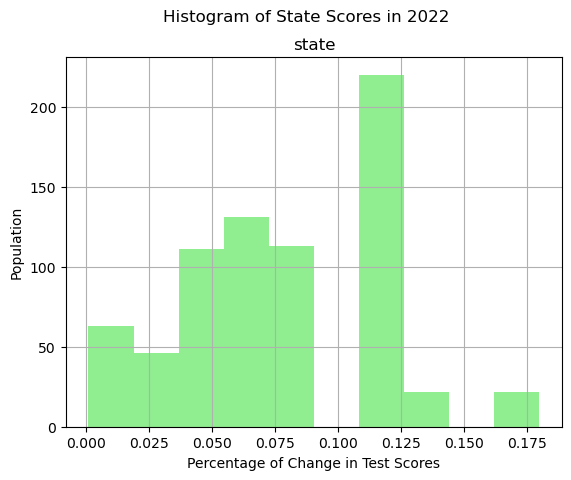

In [9]:
# Data Exploration
sc_df.describe()

# Histogram looking at frequency of increase and/or decrease in state scores
sc_df.hist(column="state", color="lightgreen")
plt.suptitle("Histogram of State Scores in 2022")
plt.xlabel("Percentage of Change in Test Scores")
plt.ylabel("Population")

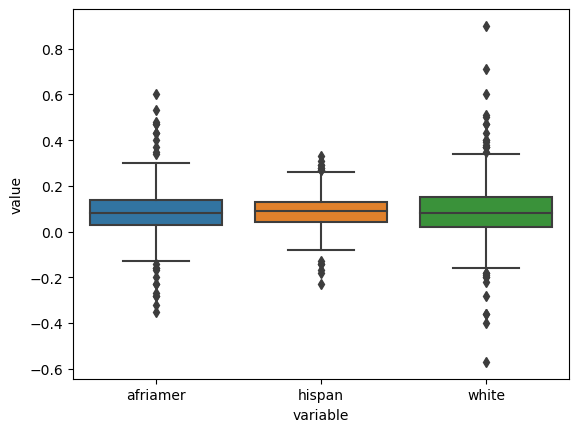

In [13]:
# Find: What is the average test scores per grade and subject?
sc_df[["state", "grade-sub"]].groupby("grade-sub").mean()

# Find number of students in each grade
# sc_df[["key"]].groupby("grade-sub").count()

# Histogram of average scores
# sc_df.hist(column="state", by="grade-sub");
demogr = sc_df.filter(["afriamer", "hispan", "white"], axis=1)
sns.boxplot(x="variable", y="value", data=pd.melt(demogr))
plt.show()

In [22]:
# Pie chart of grade levels
#sa_df.groupby(["grade-sub"]).sum().plot(kind='pie', y="state", autopct='%1.0f%%')

# sa_df.groupby(["grade-sub"]).sum().plot(kind="pie", y="key")